# Part B. Competition

# 1 Library import and data loading

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#loading dataset
df = pd.read_csv('competition_data.csv')
df.drop(['Unnamed: 0'], axis=1, inplace = True)

#looking at the head of the dataframe
df.head()

,year,price,mileage,engine_size,Automatic,Manual,Other,Semi-Auto,fuel_type_Diesel,fuel_type_Hybrid,fuel_type_Other,fuel_type_Petrol
0,2020.0,30495,1200.0,2.0,1,0,0,0,1,0,0,0
1,2020.0,29989,1000.0,1.5,1,0,0,0,0,0,0,1
2,2020.0,37899,500.0,2.0,1,0,0,0,1,0,0,0
3,2019.0,30399,5000.0,2.0,1,0,0,0,1,0,0,0
4,2019.0,29899,4500.0,2.0,1,0,0,0,1,0,0,0


In [2]:
df1 = df[['year','price', 'mileage', 'engine_size']]
df1.head()

,year,price,mileage,engine_size
0,2020.0,30495,1200.0,2.0
1,2020.0,29989,1000.0,1.5
2,2020.0,37899,500.0,2.0
3,2019.0,30399,5000.0,2.0
4,2019.0,29899,4500.0,2.0


In [3]:
# Regression models 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

#train_split_set
from sklearn.model_selection import train_test_split

#performance metric
from sklearn.metrics import mean_squared_error, r2_score

## Getting features and response variables

In [4]:
response = df1['price']
features = df1.drop('price', axis = 1)

## Split the data in training and test subsets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, response, test_size=0.1, random_state = 42)

In [6]:
# create several list to store the results
method = []
r2_list = []
rmse_list = []

# Linear Regression Model

In [7]:
#Create linear regression object
lm = LinearRegression()

# Train the model using the training sets
lm.fit(X_train, y_train)

# Make predictions using the testing set
pred_lm = lm.predict(X_test)

# Calculate the performance metrics
r2_lm = lm.score(X_test, y_test)
print('R^2 lm is:%.4f' % r2_lm)

rmse_lm  = mean_squared_error(y_test, pred_lm)**0.5
print('RMSE lm: %.4f' % rmse_lm)

# Append the results of Linear Regression Model
method.append('Linear')
r2_list.append(r2_lm)
rmse_list.append(rmse_lm)

R^2 lm is:0.4425
RMSE lm: 7358.5424


In [8]:
## Linear Regression Model with Feature Scaling

# Polynomial Regression Model

In [17]:
response = df1['price']
features = df1.drop('price', axis = 1)

#Create polynomial transformer
poly_reg = PolynomialFeatures(degree=4, include_bias=False)
poly_features = poly_reg.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(poly_features, response, test_size=0.1, random_state = 42)

poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)

poly_reg_y_predicted = poly_reg_model.predict(X_test)

# Calculate the performance metrics
r2_poly_reg = poly_reg_model.score(X_test, y_test)
print('R^2 lm is:%.4f' % r2_poly_reg)

rmse_poly_reg  = mean_squared_error(y_test, poly_reg_y_predicted)**0.5
print('RMSE lm: %.4f' % rmse_poly_reg)

# Append the results of Linear Regression Model
method.append('Polynomial')
r2_list.append(r2_poly_reg)
rmse_list.append(rmse_poly_reg)

R^2 lm is:0.5402
RMSE lm: 6682.9415


# Ridge Regression Model

In [18]:
response = df1['price']
features = df1.drop('price', axis = 1)

#Split the data in training and test subsets
X_train_rdg, X_test_rdg, Y_train_rdg, Y_test_rdg = train_test_split(features, response, test_size = 0.2, random_state = 42)

# Tuning alpha parameter in RIDGE linear model
alphas_rdg = 10**np.linspace(5, -2, 20)
alphas_rdg

ridge = Ridge()
coefs = []

for a in alphas_rdg:
    ridge.set_params(alpha = a)
    ridge.fit(features,response)
    coefs.append(ridge.coef_)

np.shape(coefs)

# Finding the optimal alpha value to the Ridge regression
rmse_list_alpha = []
r2_list_alpha = []
r2_train_list_alpha = []

for a in alphas_rdg:
    ridge = Ridge(alpha = a, max_iter=1000)
    ridge.fit(X_train_rdg, Y_train_rdg)
    pred = ridge.predict(X_test_rdg)
    
    r2_train_list_alpha.append(ridge.score(X_train_rdg, Y_train_rdg))
    r2_list_alpha.append(ridge.score(X_test_rdg,Y_test_rdg))
    rmse_r = mean_squared_error(Y_test_rdg, pred)**0.5
    rmse_list_alpha.append(rmse_r)
    #print('RMSE: %.2f'% rmse)
    
ridge_result = np.vstack((alphas_rdg, r2_train_list_alpha, r2_list_alpha, rmse_list_alpha)).T
ridge_df = pd.DataFrame(ridge_result, columns=['Alphas','R2 Train', 'R2 Test', 'RMSE'])
ridge_df.sort_values(by=['R2 Test'], ascending=False)

,Alphas,R2 Train,R2 Test,RMSE
19,0.010000,0.539808,0.496324,6518.259339
18,0.023357,0.539808,0.496324,6518.259744
17,0.054556,0.539808,0.496324,6518.260690
16,0.127427,0.539808,0.496323,6518.262900
15,0.297635,0.539808,0.496323,6518.268060
14,0.695193,0.539808,0.496321,6518.280116
13,1.623777,0.539808,0.496316,6518.308278
12,3.792690,0.539808,0.496306,6518.374082
11,8.858668,0.539808,0.496282,6518.527916
10,20.691381,0.539807,0.496227,6518.887953


In [19]:
# find out the coefficient for the best result
#Split the data in training and test subsets
#X_train_rdg, X_test_rdg, Y_train_rdg, Y_test_rdg = train_test_split(X, y, test_size = 0.2, random_state = 42)

ridge = Ridge(alpha = 0.010000)
ridge.fit(X_train_rdg, Y_train_rdg)
pred_rdg = ridge.predict(X_test_rdg)

r2_ridge = ridge.score(X_test_rdg, Y_test_rdg)
rmse_ridge =  mean_squared_error(Y_test_rdg, pred_rdg)**0.5

print('R2 in Test Set:   %.4f'% ridge.score(X_test_rdg, Y_test_rdg))
print('RMSE in Test Set: %.4f'% mean_squared_error(Y_test_rdg, pred_rdg)**0.5)

# Append the results of RIDGE Regression Model
method.append('RIDGE')
r2_list.append(r2_ridge)
rmse_list.append(rmse_ridge)

R2 in Test Set:   0.4963
RMSE in Test Set: 6518.2593


# Lasso Regression Model

In [20]:
# Features and response variables
response = df1.price
features = df1.drop('price', axis = 1)

#Split the data in training and test subsets
X_train_lss, X_test_lss, Y_train_lss, Y_test_lss = train_test_split(features, response, test_size = 0.2, random_state = 42)

alphas_lss = np.linspace(1, 0.01, 20)

# Tuning alpha parameter in LASSO linear model
lasso = Lasso()
coefs = []

for a in alphas_lss:
    lasso.set_params(alpha = a)
    lasso.fit(features,response)
    coefs.append(lasso.coef_)

np.shape(coefs)

#Finding the optimal alpha value to the Lasso regression
rmse_list_ls = []
r2_list_ls = []
r2_train_list_ls = []

for a in alphas_lss:
    lasso = Lasso(alpha = a, max_iter=1000)
    lasso.fit(X_train_lss, Y_train_lss)
    pred = lasso.predict(X_test_lss)
    
    r2_train_list_ls.append(lasso.score(X_train_lss, Y_train_lss))
    r2_list_ls.append(lasso.score(X_test_lss,Y_test_lss))
    rmse_ls = mean_squared_error(Y_test_lss, pred)**0.5
    rmse_list_ls.append(rmse_ls)
    #print('RMSE: %.2f'% rmse)
    
lasso_result = np.vstack((alphas_lss, r2_train_list_ls, r2_list_ls, rmse_list_ls)).T
lasso_df = pd.DataFrame(lasso_result, columns=['Alphas','R2 Train', 'R2 Test', 'rmse'])
lasso_df.sort_values(by=['R2 Test'], ascending=False)

,Alphas,R2 Train,R2 Test,rmse
19,0.010000,0.539808,0.496324,6518.259674
18,0.062105,0.539808,0.496323,6518.262993
17,0.114211,0.539808,0.496323,6518.266317
16,0.166316,0.539808,0.496322,6518.269631
15,0.218421,0.539808,0.496322,6518.272970
14,0.270526,0.539808,0.496321,6518.276267
13,0.322632,0.539808,0.496321,6518.279607
12,0.374737,0.539808,0.496320,6518.282946
11,0.426842,0.539808,0.496320,6518.286286
10,0.478947,0.539808,0.496319,6518.289557


In [21]:
# find out the coefficient of the best result obtained from our lasso

lasso = Lasso(alpha = 0.010000)
lasso.fit(X_train_lss, Y_train_lss)
pred_lss = lasso.predict(X_test_lss)

r2_lasso = lasso.score(X_test_lss, Y_test_lss)
rmse_lasso =  mean_squared_error(Y_test_lss, pred_lss)**0.5

print('R2 in Test Set: %.4f'% lasso.score(X_test_lss, Y_test_lss))
print('RMSE in Test Set: %.4f' % mean_squared_error(Y_test_lss, pred_lss)**0.5)

# Append the results of Linear Regression Model
method.append('LASSO')
r2_list.append(r2_lasso)
rmse_list.append(rmse_lasso)

R2 in Test Set: 0.4963
RMSE in Test Set: 6518.2597


# Comparing the best R^2 and RMSE score regression models

In [22]:
results = np.vstack((method, r2_list, rmse_list)).T
results_df = pd.DataFrame(results, columns=['Method','R2','RMSE'])
results_df.sort_values(by=['R2'], ascending=False)

,Method,R2,RMSE
1,Polynomial,0.5401905638398217,6682.941473245698
4,Polynomial,0.5401905638398217,6682.941473245698
2,RIDGE,0.4963238946022873,6518.2593390763805
5,RIDGE,0.4963238946022873,6518.2593390763805
3,LASSO,0.496323842884402,6518.259673726542
6,LASSO,0.496323842884402,6518.259673726542
0,Linear,0.4425240234329345,7358.542396988931


# Visualizating the best regression model

In [23]:
# Features and response variables
response = df1.price
features = df1.drop('price', axis = 1)

poly_reg = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly_reg.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(poly_features, response, test_size=0.1, random_state = 42)

poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)

poly_reg_y_predicted = poly_reg_model.predict(X_test)

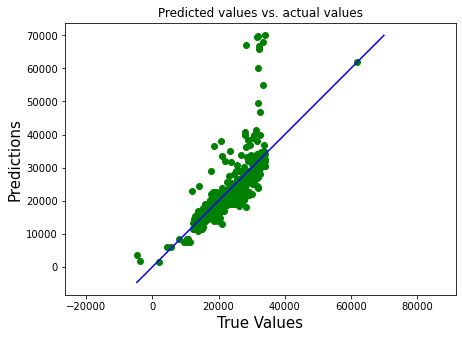

In [24]:
plt.figure(figsize=(7,5))
actual_values = y_test
plt.scatter(poly_reg_y_predicted, actual_values, c='green')

p1 = max(max(poly_reg_y_predicted), max(actual_values))
p2 = min(min(poly_reg_y_predicted), min(actual_values))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('Predicted values vs. actual values')
plt.axis('equal')
plt.show()